In [1]:
import datetime
import numpy as np
import pandas as pd
from pandas_datareader import wb
import pandas_datareader.data as web
from sklearn.datasets import make_blobs
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_rows', 5)
pd.set_option('precision', 3)
%matplotlib inline

## グラフの種類
---
目的に応じて適切なものを選ぶ。

### 分布の確認
---
棒グラフ・ヒストグラム・散布図を用いる。
<table class="border text-center background-bright">
    <tr class="background-dark">
        <th>変数の数</th>
        <th>変数の種類</th>
        <th>グラフの種類</th>
    </tr>
    <tr>
        <td rowspan="2">1変数</td>
        <td>離散値</td>
        <td>棒グラフ</td>
    </tr>
    <tr>
        <td>連続値</td>
        <td>ヒストグラム</td>
    </tr>
    <tr>
        <td>2変数</td>
        <td></td>
        <td>散布図</td>
    </tr>
</table>

### 構成の確認
---
積み上げ棒グラフを用いる。

円グラフで構成を表現することもあるが、一般にデータ分析では**円グラフは好まれない**。人間の目は長さに比べて角度や面積で定量的に比較するのに弱いため。

### グループ間の比較
---
層別グラフを用いる。

### 時系列での変化
---
折れ線グラフや積み上げ棒グラフを用いる。

## 強調表現
---
他人に伝えるためのグラフでは、適切な強調表現を用いることでデータから得られる意味が伝わりやすくなる。グラフの調整はプログラミングで行うより、表計算ソフトなどを使うほうがやりやすい。  
自分がデータを理解するためのグラフでは、一部を強調すると他に目が行かなくなるので、不必要に強調表現を使わない。

### 情報の集中・不要な情報の除去
---
伝えたい情報を絞り込み、**不要な情報は削除**する。例えば、具体的な値を伝えたいのでなければ軸は不要、特定の値だけが必要な場合は軸を省略してグラフ上にその値だけを表示してもよい。  
見慣れないグラフを用いて、グラフからの情報の読み取り方に**不必要な集中力**を割かせない。

###### 練習問題

economics データセットの`unemploy`列を折れ線グラフで表示し、期間中の最大値とその日付が伝わるように表現してみる。

In [2]:
economics = pd.read_csv('data/economics.csv')
print('economics')
display(economics)

economics


,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
...,...,...,...,...,...,...
572,2015-03-01,12161.5,320707,5.2,12.2,8575
573,2015-04-01,12158.9,320887,5.6,11.7,8549


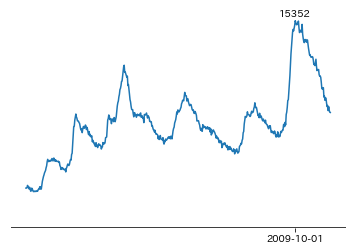

In [3]:
x = economics['unemploy'].values.argmax()
y = economics['unemploy'].max()
economics['unemploy'].plot()
plt.text(
    x, y * 1.01, y, horizontalalignment='center', verticalalignment='bottom')
plt.box(False)
xmin, xmax = plt.xlim()
plt.axhline(xmin=xmin, xmax=xmax, color='black')
plt.ylim((0, y * 1.05))
plt.xticks((x, ), (economics['date'][x], ))
plt.yticks(())
plt.show()

### 色
---
彩度の低い (黒に近い) ものより**彩度の高い** (鮮やかな) ものが目立つ。  
背景との**明度差**が大きいものほど目立つ。透明度で調整してもよい。  
色数は多くなるとどこに注目してよいかわからなくなる。注目してほしいものだけ色をつけ、他は枠で囲ったりマーカーの形を変えるなどして区別する。

###### 練習問題

blobsデータセットで、4つのグループがあることがわかるようにし、 $\displaystyle x >0,y >0$ のグループを色によって目立たせる。

blobs


,x,y
0,-7.085,6.930
1,-4.595,-4.711
...,...,...
98,-4.125,3.289
99,3.972,-5.585


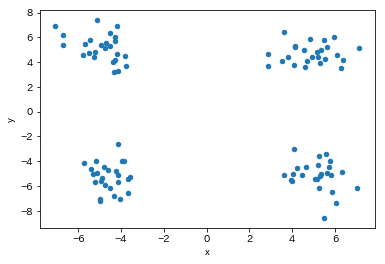

In [4]:
ticks = (-5, 5)
xx, yy = np.meshgrid(ticks, ticks)
centers = np.c_[xx.ravel(), yy.ravel()]
data, _ = make_blobs(centers=centers, random_state=1234)
blobs = pd.DataFrame(data, columns=['x', 'y'])
print('blobs')
display(blobs)
blobs.plot.scatter('x', 'y')
plt.show()

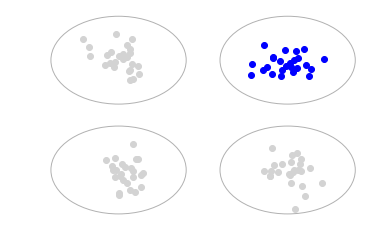

In [5]:
from matplotlib.patches import Circle

x_positive = blobs['x'].values > 0
y_positive = blobs['y'].values > 0
ax = plt.gca()
for i, x_condition in enumerate([x_positive, ~x_positive]):
    for j, y_condition in enumerate([y_positive, ~y_positive]):
        if i + j == 0:
            kwargs = dict(color='blue')
        else:
            kwargs = dict(color='lightgray')
        plt.scatter(
            'x', 'y', data=blobs.loc[x_condition & y_condition], **kwargs)
        ax.add_patch(
            Circle(
                xy=(5 if i else -5, 5 if j else -5),
                radius=4,
                fill=None,
                alpha=0.3))
plt.gca().axis('off')
plt.show()

### 大きさ
---
サイズの**大きい**もの・線の**太い**ものが目立つ。

###### 練習問題

sizeデータセットのそれぞれの値を、値に応じたフォントサイズで順に並べて表示する。

In [6]:
np.random.seed(1234)
size = pd.DataFrame(dict(size=np.random.randint(low=1, high=100, size=4)))
size

,size
0,48
1,84
2,39
3,54


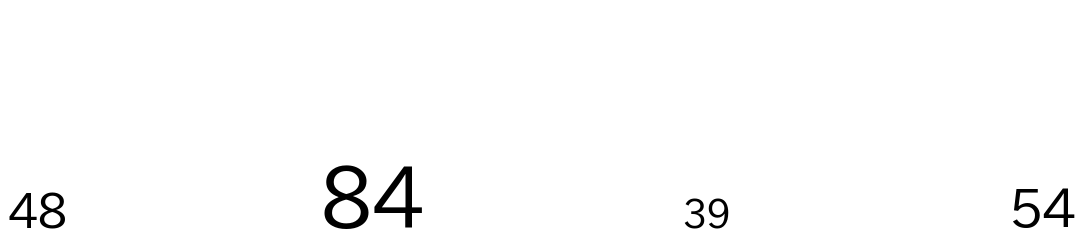

In [7]:
for i, row in size.iterrows():
    plt.text(i, 0, row['size'], fontdict=dict(fontsize=row['size']), horizontalalignment='center')
plt.gca().axis('off')
plt.show()

### 不適切な強調表現

#### 軸の開始地点
---
原点 $0$ に意味のある (量・比率が問題になる) 場合は、軸の開始地点を原点以外にすると誤った印象を与える。

###### 練習問題

lowvarデータセットの縦軸を原点から開始した折れ線グラフを表示し、原点から始まっていないグラフから受ける印象と比較してみる。

lowvar


,value
0,100.471
1,98.809
...,...
8,100.016
9,97.757


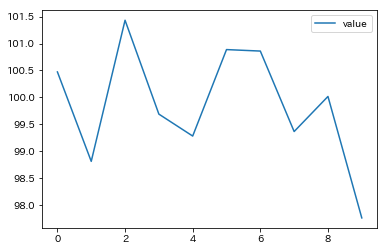

In [8]:
np.random.seed(1234)
lowvar = pd.DataFrame(dict(value=np.random.normal(loc=1e2, scale=1, size=10)))
print('lowvar')
display(lowvar)
lowvar.plot()
plt.show()

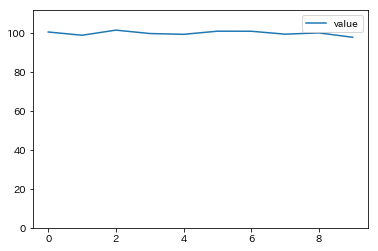

In [9]:
lowvar.plot()
plt.ylim((0, lowvar['value'].max() * 1.1))
plt.show()

#### ユニバーサルデザインへの配慮を欠く
---
色覚障害者に識別しづらい色表現を用いたり、過度に文化的コンテキストに依存した意味づけ (何色は〇〇という意味を持つなど) を用いたりするのは、今日では避けたほうがよい。

## データの加工

### カテゴリカル変数の順序
---
棒グラフなどカテゴリカル変数ごとの値を表示する場合は、カテゴリカル変数に順序がない場合は値の大きい順にソートして表示すると理解しやすい。  
変数に順序がある場合には、変数の順序に従ったほうがよい場合もある。例えば、日本の都道府県コードは概ね北から順に並んでいるため、都道府県コード順に並べると棒グラフと地理的位置関係が対応してわかりやすくなる。

###### 練習問題

car_crashesデータセットを`pandas.DataFrame.sort_values`関数を用いて`total`列でソートし、値の大きい順に10件のデータだけに絞ったデータフレーム`limited`を作成し、棒グラフを表示する。

In [10]:
car_crashes = sns.load_dataset('car_crashes')[['total', 'abbrev']]
print('car_crashes')
display(car_crashes)

car_crashes


,total,abbrev
0,18.8,AL
1,18.1,AK
...,...,...
49,13.8,WI
50,17.4,WY


In [11]:
pd.DataFrame.sort_values??

In [12]:
limited = car_crashes.sort_values('total', ascending=False).iloc[:10]

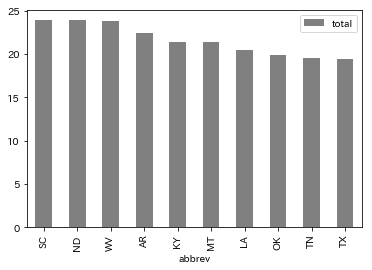

In [13]:
limited.plot.bar('abbrev', 'total', color='gray')
plt.show()

### 時系列データの値
---
時系列データを折れ線グラフで表現する場合には、そのままの値ではなく何らかの加工を施したほうが理解しやすくなる場合がある。

### 指数化
---
先進国と途上国のGDP推移比較など、スケール (値の大きさ) の異なる系列同士の場合にはある時点の値を基準 (100など) とした指数に直してスケールを揃えたほうが比較しやすい。

###### 練習問題

stocksデータセットの各列を`pandas.DataFrame.apply`を用いて`2018-01-02`時点の値を基準に指数化したデータフレーム`scaled`を作成し、複数系列折れ線グラフで表示する。

In [14]:
tiingo_access_key = 'YOUR_API_KEY'
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 12, 31)
column_map = dict(GOOGL='Google', AAPL='Apple', FB='Facebook', AMZN='Amazon')
stocks = web.DataReader(['GOOGL', 'AAPL', 'FB', 'AMZN'],
                        'tiingo',
                        start,
                        end,
                        access_key=tiingo_access_key)['close'].unstack(level=0)
stocks.columns = [column_map[k] for k in stocks.columns]
print('stocks')
display(stocks)

stocks


,Apple,Amazon,Facebook,Google
date,,,,
2018-01-02,172.26,1189.01,181.42,1073.21
2018-01-03,172.23,1204.20,184.67,1091.52
...,...,...,...,...
2018-12-28,156.23,1478.02,133.20,1046.68
2018-12-31,157.74,1501.97,131.09,1044.96


In [15]:
pd.DataFrame.apply??

In [16]:
scaled = stocks.apply(lambda s: s / s.loc['2018-01-02'] * 100)

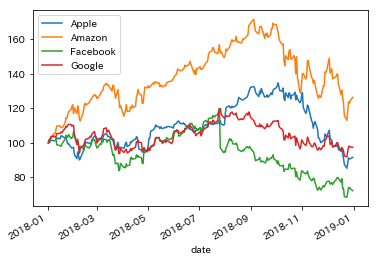

In [17]:
scaled.plot()
plt.show()

### 移動平均
---
小さい変動の影響を除いた、大きな傾向を把握したい場合には前後のデータとの平均である移動平均を用いる。

###### 練習問題

stocksデータセットの各列を`pandas.DataFrame.rolling`関数を用いて、前後2件ずつの移動平均に変換したデータセット`moving_average`を作成し、折れ線グラフを表示する。

In [18]:
print('stocks')
display(stocks)

stocks


,Apple,Amazon,Facebook,Google
date,,,,
2018-01-02,172.26,1189.01,181.42,1073.21
2018-01-03,172.23,1204.20,184.67,1091.52
...,...,...,...,...
2018-12-28,156.23,1478.02,133.20,1046.68
2018-12-31,157.74,1501.97,131.09,1044.96


In [19]:
pd.DataFrame.rolling??

In [20]:
moving_average = stocks.rolling(5, center=True).mean()

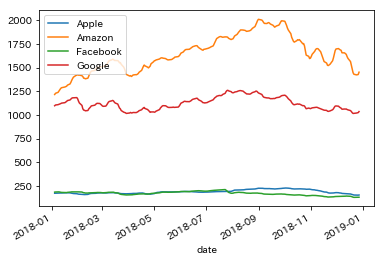

In [21]:
moving_average.plot()
plt.show()

### 対数化
---
複利効果がある場合など、時間の経過とともに値の大きさや振れ幅が大きくなるようなデータでは、対数 log の折れ線グラフを用いると傾向を把握しやすい。  
対数をとった場合はグラフの傾きが成長率を表すため、傾きが一定ならば成長率が一定と解釈する。

###### 練習問題

gdpデータセットの対数をとったデータセット`log_gdp`を作成し、複数系列折れ線グラフを表示する。

gdp


country,China,Japan,United States
year,,,
1960,59716467625,44307342950,543300000000
1961,50056868957,53508617739,563300000000
...,...,...,...
2016,11137945669350,4926667087367,18707188235000
2017,12143491448186,4859950558538,19485393853000


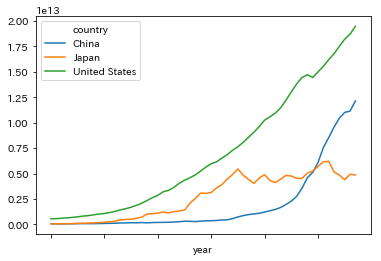

In [22]:
gdp = wb.download(indicator='NY.GDP.MKTP.CD', country=['JP', 'US', 'CN'], start=1960, end=2017).unstack(level=0).astype(int)
gdp.columns = gdp.columns.levels[1]
print('gdp')
display(gdp)
gdp.plot()
plt.show()

In [23]:
log_gdp = gdp.apply(np.log)

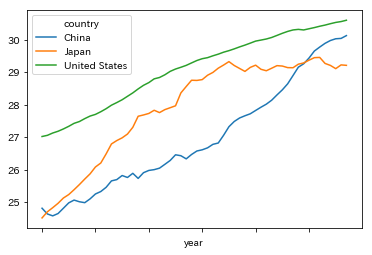

In [24]:
log_gdp.plot()
plt.show()

### 変化率
---
周期性のあるデータや成長率が重要なデータなどでは、一定期間前との比率を用いる。  
対数の差分は、経済成長率など成長率が小さい値の場合には近似値として利用可能。

###### 練習問題

passengersデータセットを`pandas.DataFrame.shift`関数や`pandas.DataFrame.diff`関数を用いて、前年同期との成長率・対数差分を表す`成長率`列・`対数差分`列を作成し、複数系列折れ線グラフで重ねて表示する。

flights


,year,month,passengers
0,1949,January,112
1,1949,February,118
...,...,...,...
142,1960,November,390
143,1960,December,432


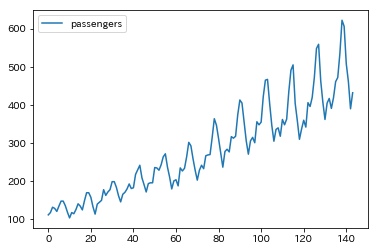

In [25]:
flights = sns.load_dataset('flights')
print('flights')
display(flights)
flights.plot(y='passengers')
plt.show()

In [26]:
pd.DataFrame.shift??

In [27]:
pd.DataFrame.diff??

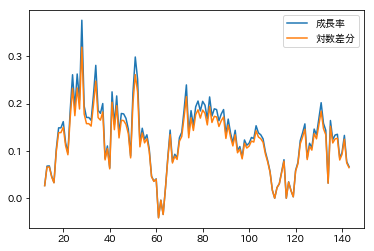

In [28]:
flights['成長率'] = flights['passengers'] / flights['passengers'].shift(12) - 1
flights['対数差分'] = flights['passengers'].apply(np.log).diff(12)
flights[['成長率', '対数差分']].plot()
plt.show()